In [ ]:
#unzip the data file and rename the unzipped file to data.csv
# import zipfile

# with zipfile.ZipFile('data/Melbourne_housing_FULL.zip', 'r') as zip_ref:
#     zip_ref.extractall('.')
# import os
# os.rename('Melbourne_housing_FULL.csv', 'data.csv')

In [4]:
# Import libraries here
import warnings

from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [5]:
# read the data
houses = pd.read_csv('data.csv')

In [6]:
#get the shape of the data
houses.shape

(34857, 21)

In [ ]:
# get the info of the data
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
#get the columns with more than 50% missing values
houses.columns[houses.isnull().mean() > 0.5]

Index(['BuildingArea', 'YearBuilt'], dtype='object')

In [ ]:
# check cardinality of the categorical features
houses.select_dtypes(exclude='number').nunique()

Suburb           351
Address        34009
Type               3
Method             9
SellerG          388
Date              78
CouncilArea       33
Regionname         8
dtype: int64

#### EDA: Univariate Analysis

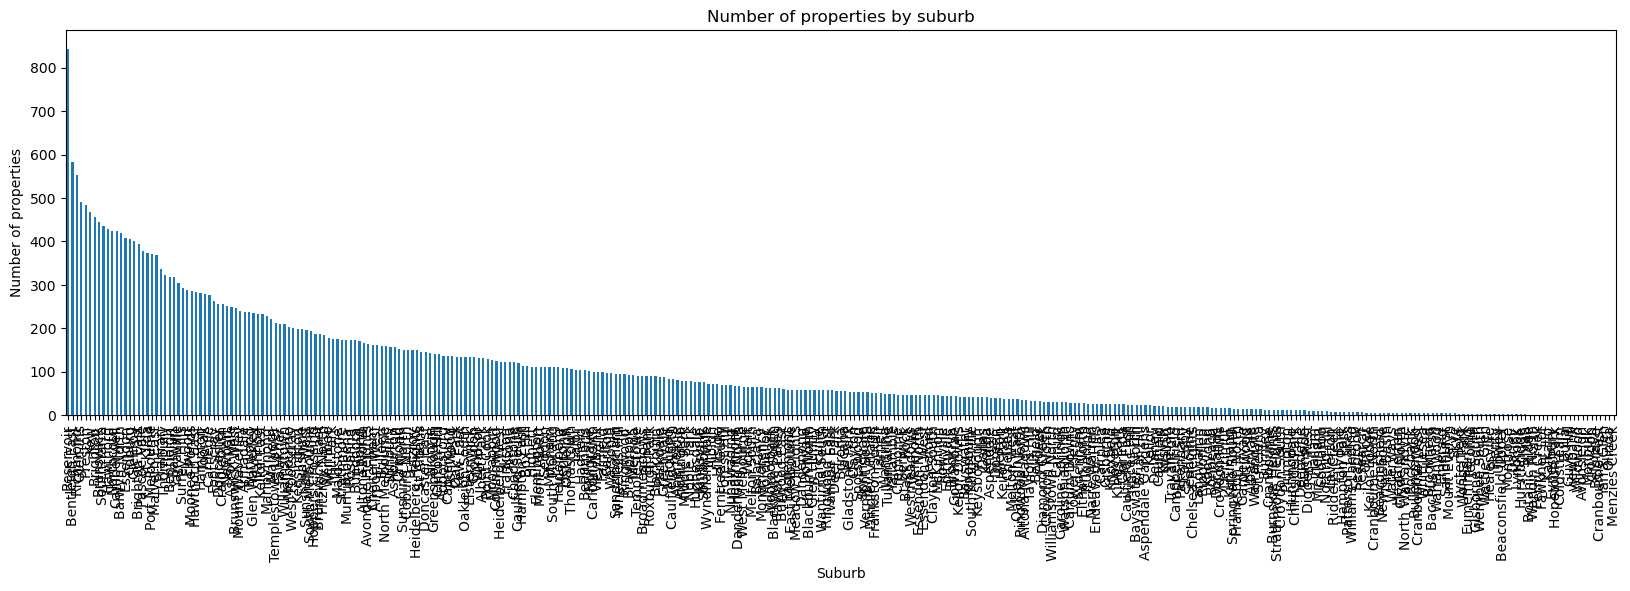

In [ ]:
# visualize the number of properties by suburb
houses['Suburb'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by suburb')
plt.ylabel('Number of properties')
plt.xlabel('Suburb')
plt.show()

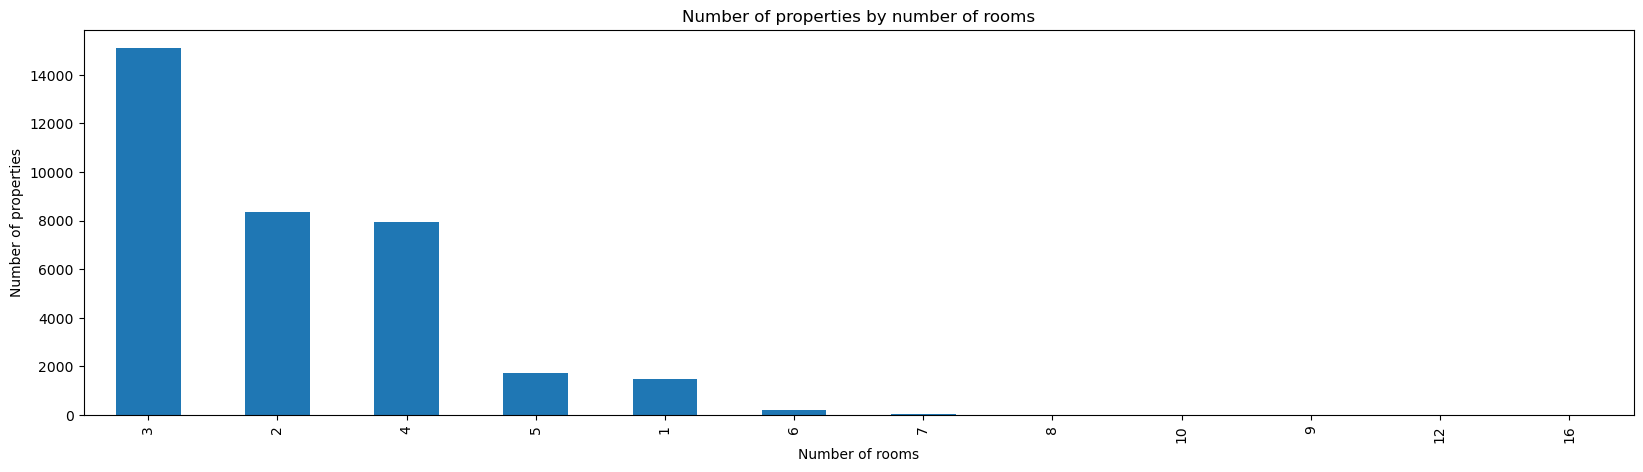

In [ ]:
# visualize the spread of the rooms
houses['Rooms'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by number of rooms')
plt.ylabel('Number of properties')
plt.xlabel('Number of rooms')
plt.show()

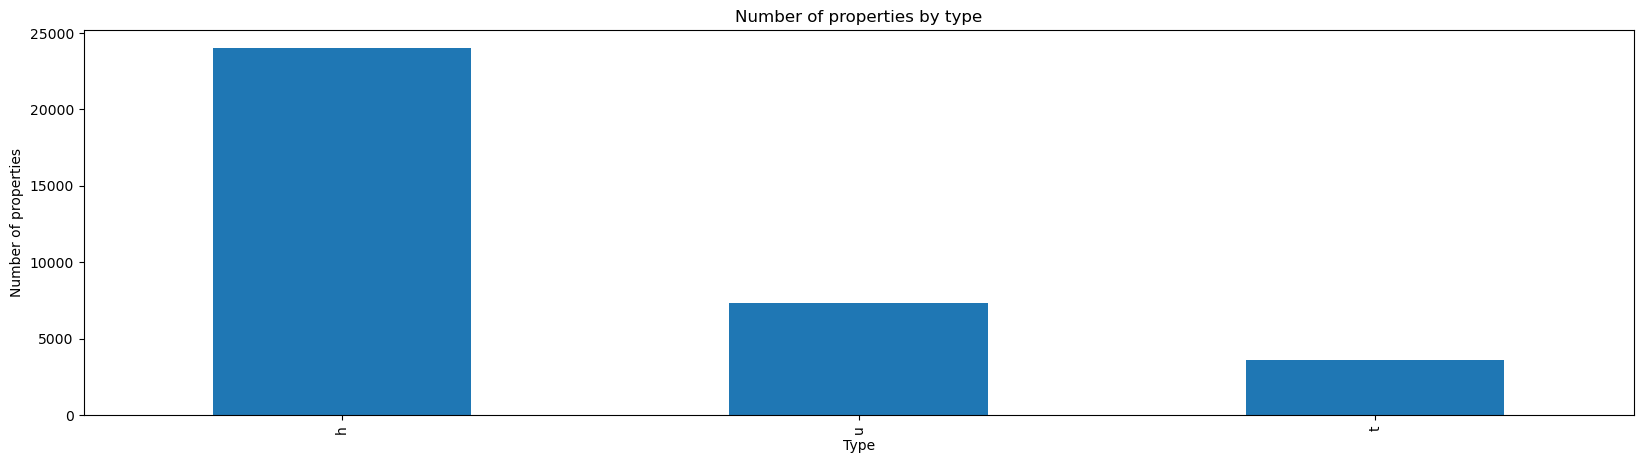

In [ ]:
# visualize the spread of the type of property
houses['Type'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by type')
plt.ylabel('Number of properties')
plt.xlabel('Type')
plt.show()

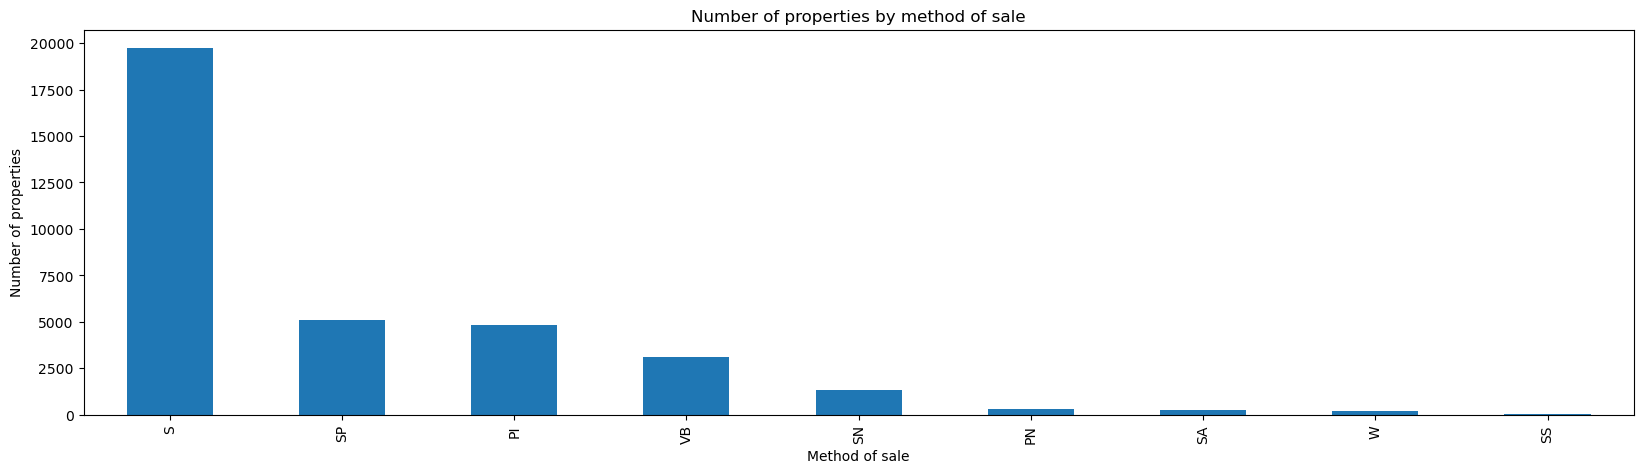

In [ ]:
# visualize the spread of the method of sale
houses['Method'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by method of sale')
plt.ylabel('Number of properties')
plt.xlabel('Method of sale')
plt.show()

In [ ]:
# get the value count of the Seller
houses['SellerG'].value_counts()

Jellis             3359
Nelson             3236
Barry              3235
hockingstuart      2623
Marshall           2027
                   ... 
Clairmont             1
Buxton/Find           1
Harcourts/Barry       1
Silver                1
Methven               1
Name: SellerG, Length: 388, dtype: int64

In [ ]:
#describe the distance to the CBD
houses['Distance'].describe()

count    34856.000000
mean        11.184929
std          6.788892
min          0.000000
25%          6.400000
50%         10.300000
75%         14.000000
max         48.100000
Name: Distance, dtype: float64

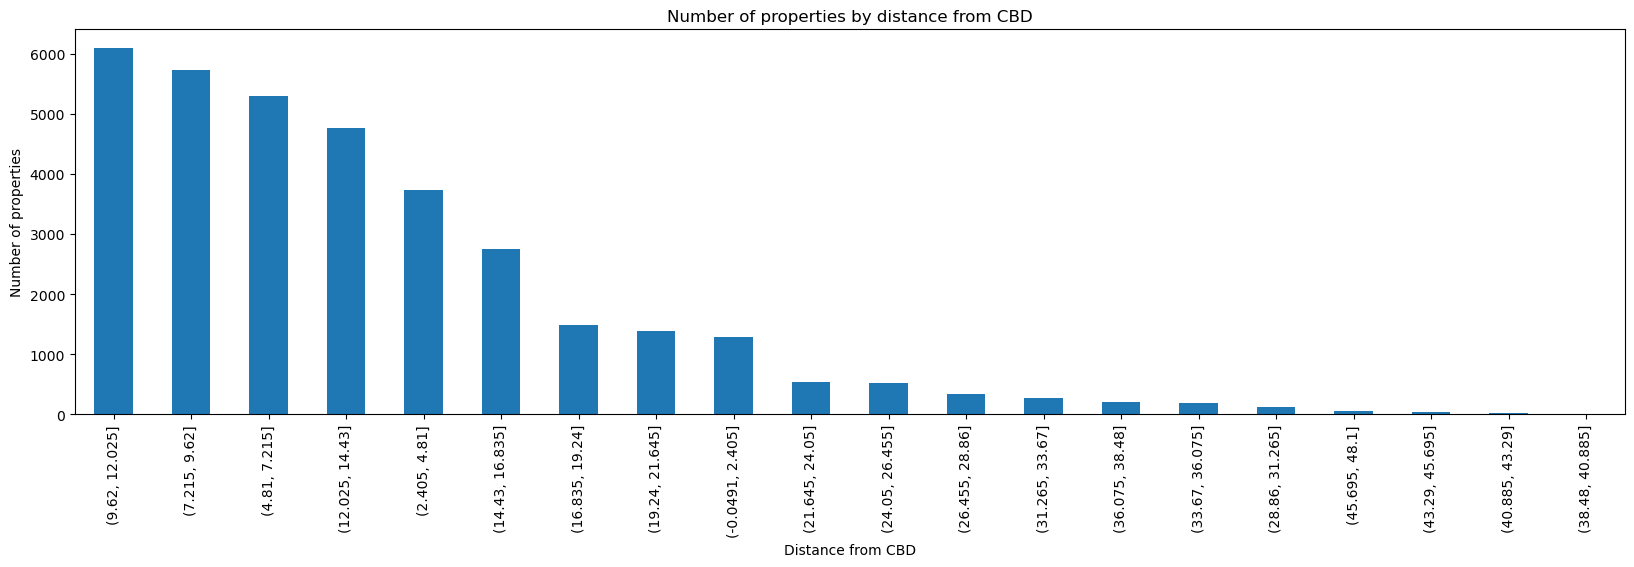

In [ ]:
# visualize the binned spread of the distance from the CBD
houses['Distance'].value_counts(bins=20).plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by distance from CBD')
plt.ylabel('Number of properties')
plt.xlabel('Distance from CBD')
plt.show()

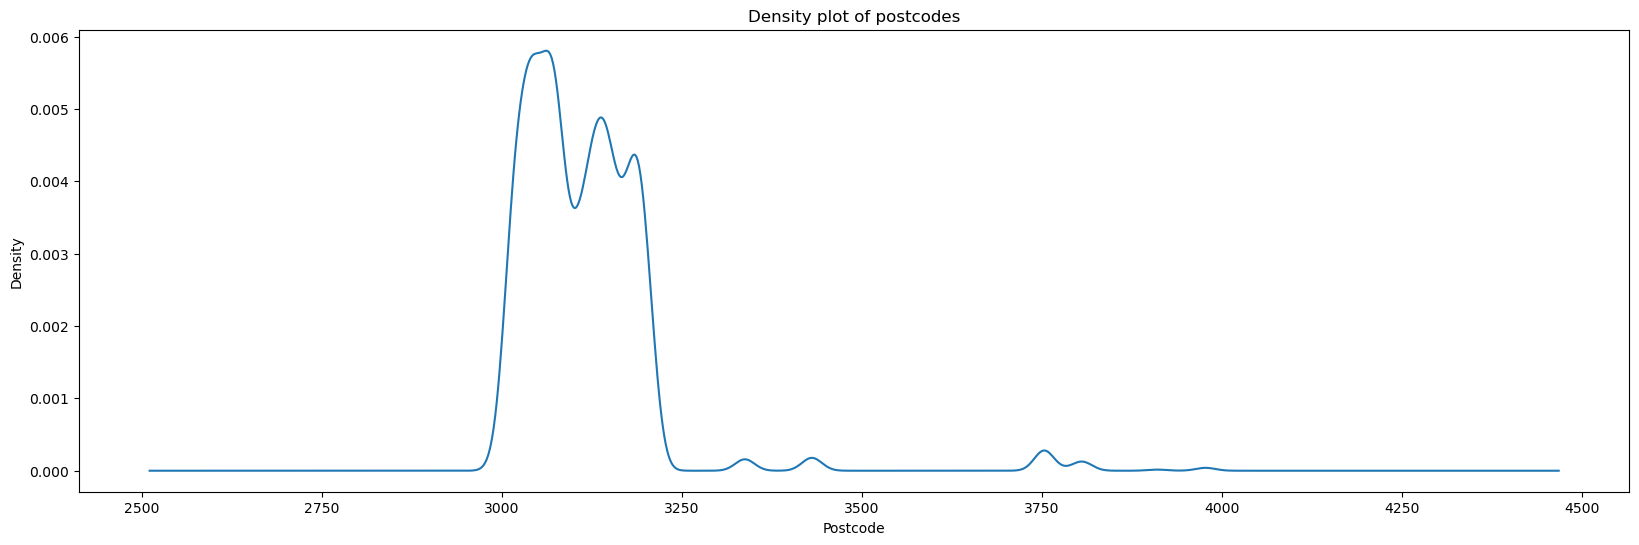

In [ ]:
#visualize the density plot of of the postcodes
houses['Postcode'].plot.density(figsize=(20, 6))
plt.title('Density plot of postcodes')
plt.ylabel('Density')
plt.xlabel('Postcode')
plt.show()

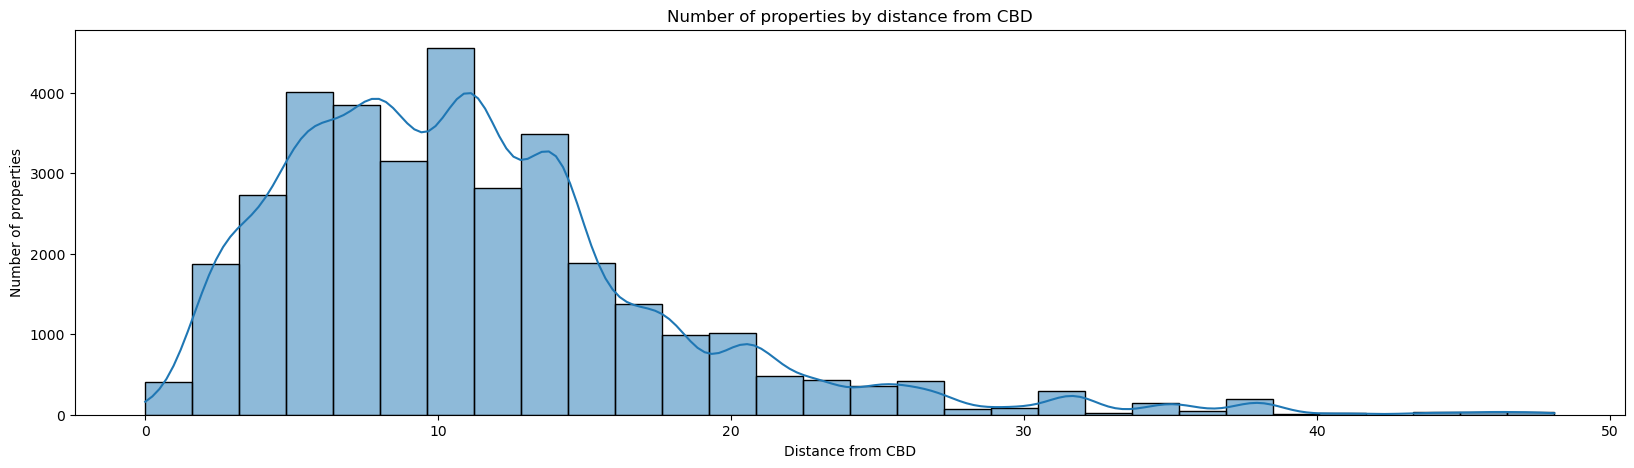

In [ ]:
# visualize a histplot of the distance from the CBD
plt.figure( figsize=(20, 5))
sns.histplot(houses['Distance'], bins=30, kde=True)
plt.title('Number of properties by distance from CBD')
plt.ylabel('Number of properties')
plt.xlabel('Distance from CBD')
plt.show()

In [ ]:
#describe the number of bedrooms
houses['Bedroom2'].describe()

count    26640.000000
mean         3.084647
std          0.980690
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         30.000000
Name: Bedroom2, dtype: float64

In [ ]:
#how many properties have more than 10 rooms
houses[houses['Bedroom2'] > 10]['Bedroom2'].count()

4

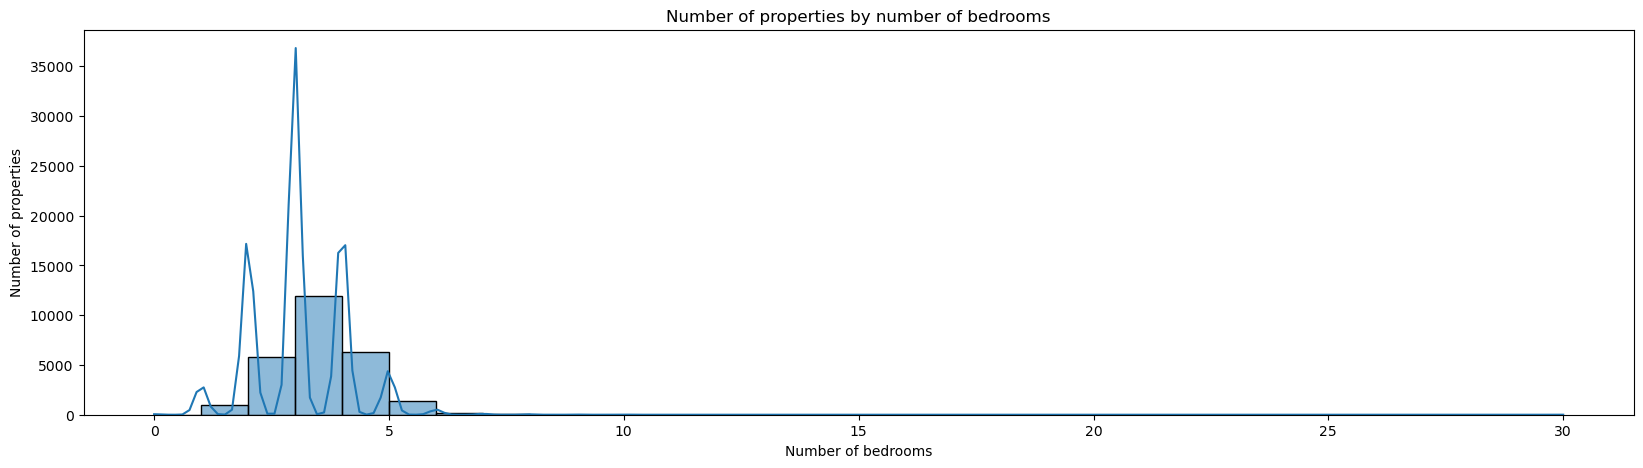

In [ ]:
# visualize the histplot of the number of bedrooms
plt.figure( figsize=(20, 5))
sns.histplot(houses['Bedroom2'], bins=30, kde=True)
plt.title('Number of properties by number of bedrooms')
plt.ylabel('Number of properties')
plt.xlabel('Number of bedrooms')
plt.show()

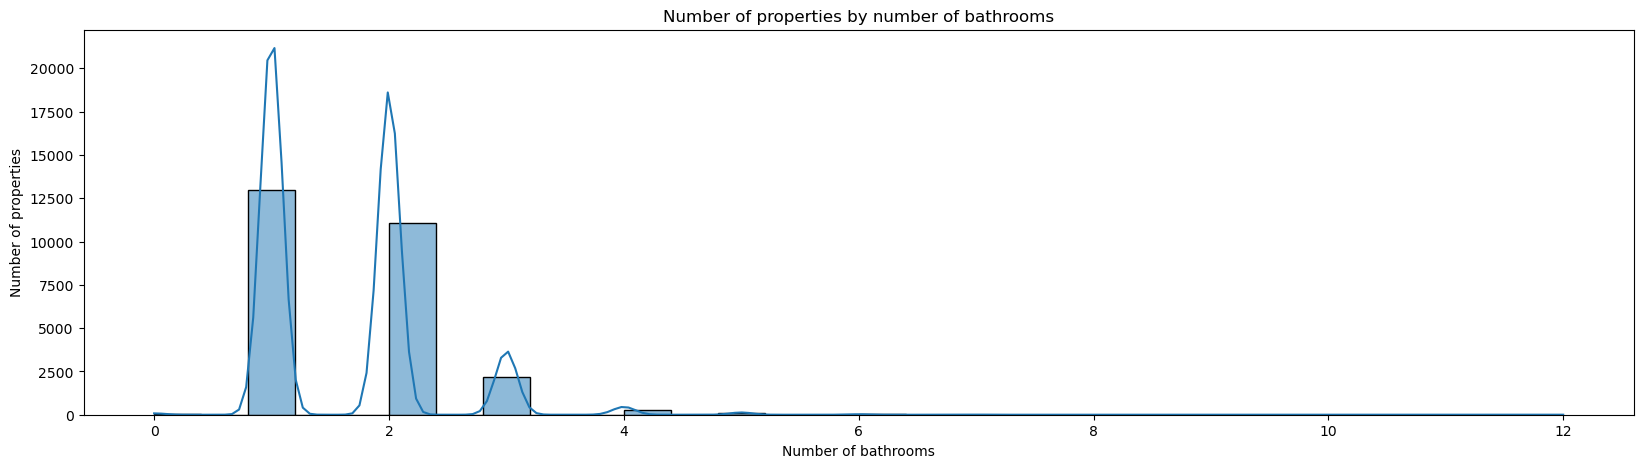

In [ ]:
# visualize the histplot of the number of bathrooms
plt.figure( figsize=(20, 5))
sns.histplot(houses['Bathroom'], bins=30, kde=True)
plt.title('Number of properties by number of bathrooms')
plt.ylabel('Number of properties')
plt.xlabel('Number of bathrooms')
plt.show()

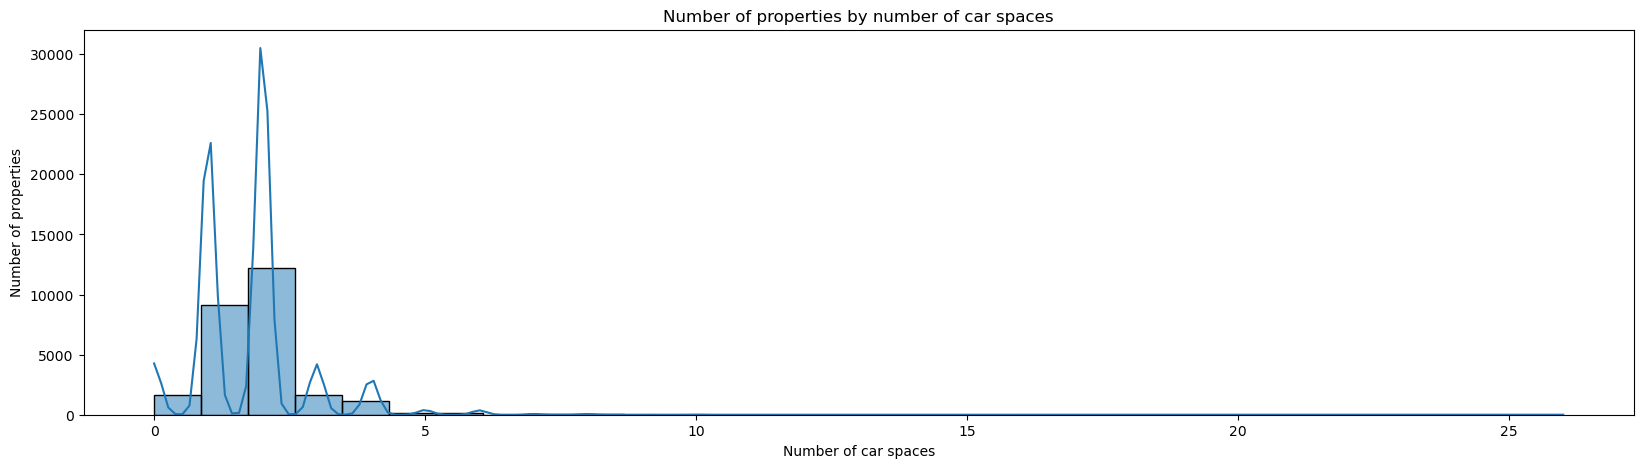

In [ ]:
# visualize the histplot of the number of car spaces
plt.figure( figsize=(20, 5))
sns.histplot(houses['Car'], bins=30, kde=True)
plt.title('Number of properties by number of car spaces')
plt.ylabel('Number of properties')
plt.xlabel('Number of car spaces')
plt.show()

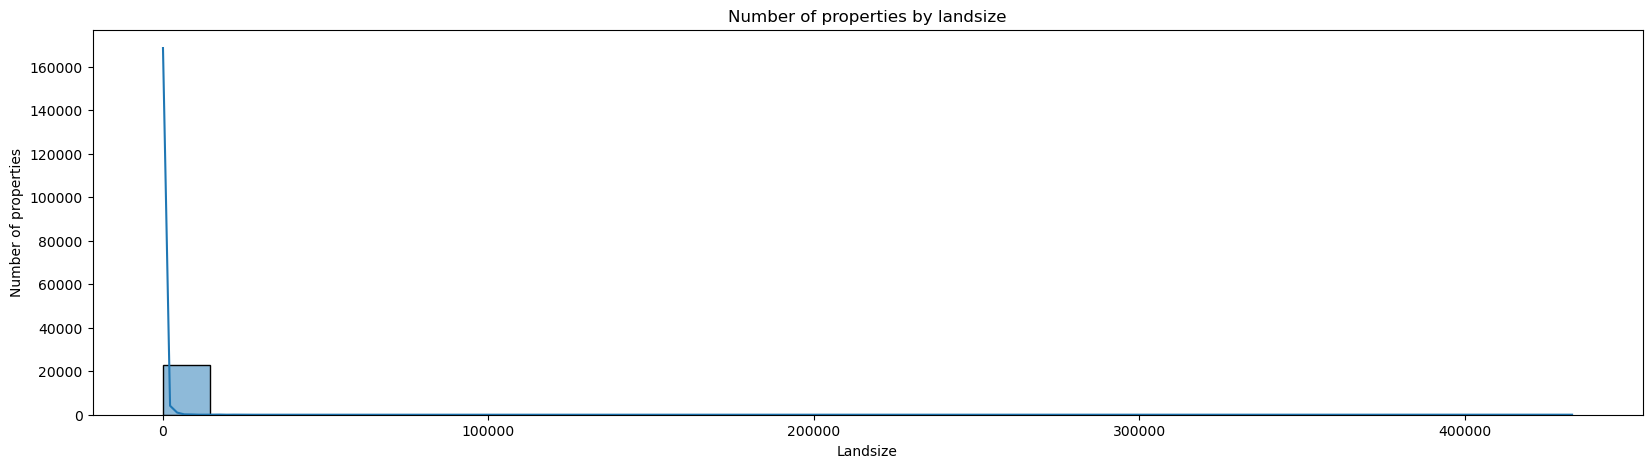

In [ ]:
# visualize the distribution of the number of landsize
plt.figure( figsize=(20, 5))
sns.histplot(houses['Landsize'], bins=30, kde=True)
plt.title('Number of properties by landsize')
plt.ylabel('Number of properties')
plt.xlabel('Landsize')
plt.show()

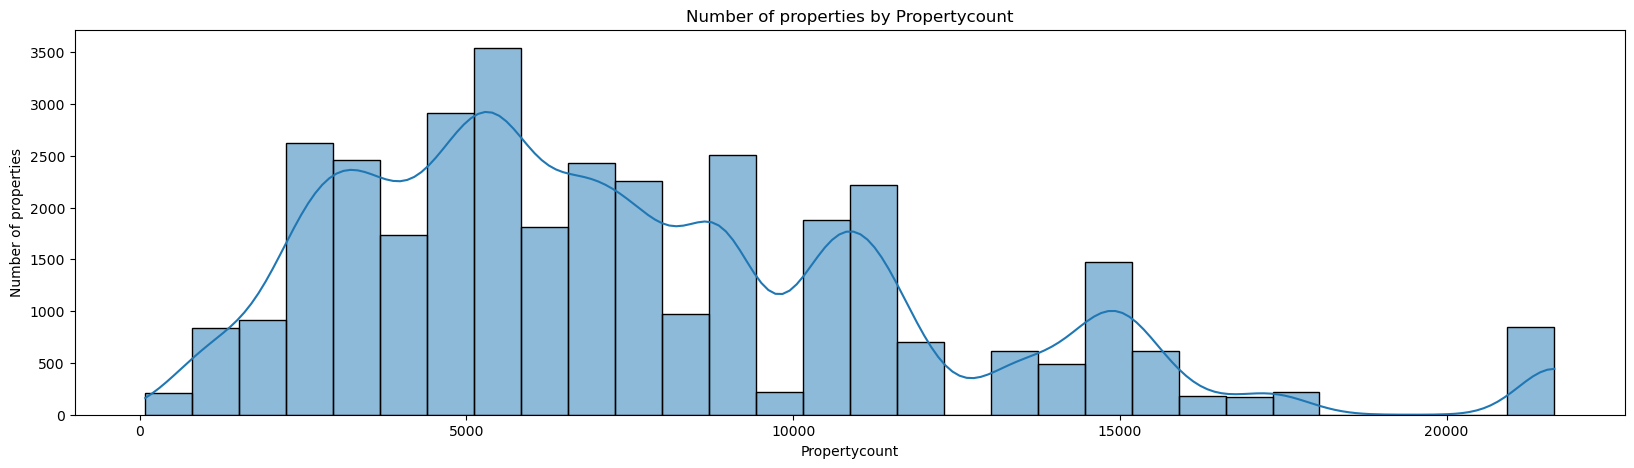

In [ ]:
#visualize the distribution of the Propertycount
plt.figure( figsize=(20, 5))
sns.histplot(houses['Propertycount'], bins=30, kde=True)
plt.title('Number of properties by Propertycount')
plt.ylabel('Number of properties')
plt.xlabel('Propertycount')
plt.show()

In [ ]:
#get value count of the Propertycount
houses['Propertycount'].value_counts()

21650.0    844
8870.0     722
10969.0    583
14949.0    552
10412.0    491
          ... 
129.0        1
1588.0       1
5462.0       1
1160.0       1
342.0        1
Name: Propertycount, Length: 342, dtype: int64

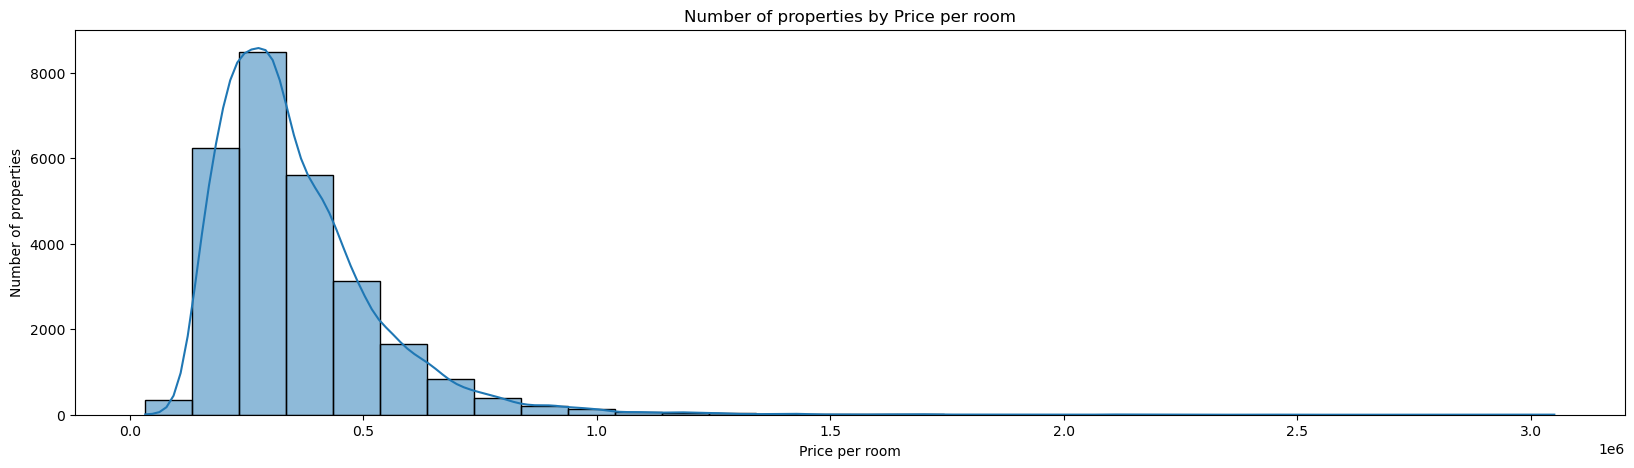

In [ ]:
# visualize the distrubtion of PpR: Price per room
plt.figure( figsize=(20, 5))
sns.histplot(houses['PpR'], bins=30, kde=True)
plt.title('Number of properties by Price per room')
plt.ylabel('Number of properties')
plt.xlabel('Price per room')
plt.show()

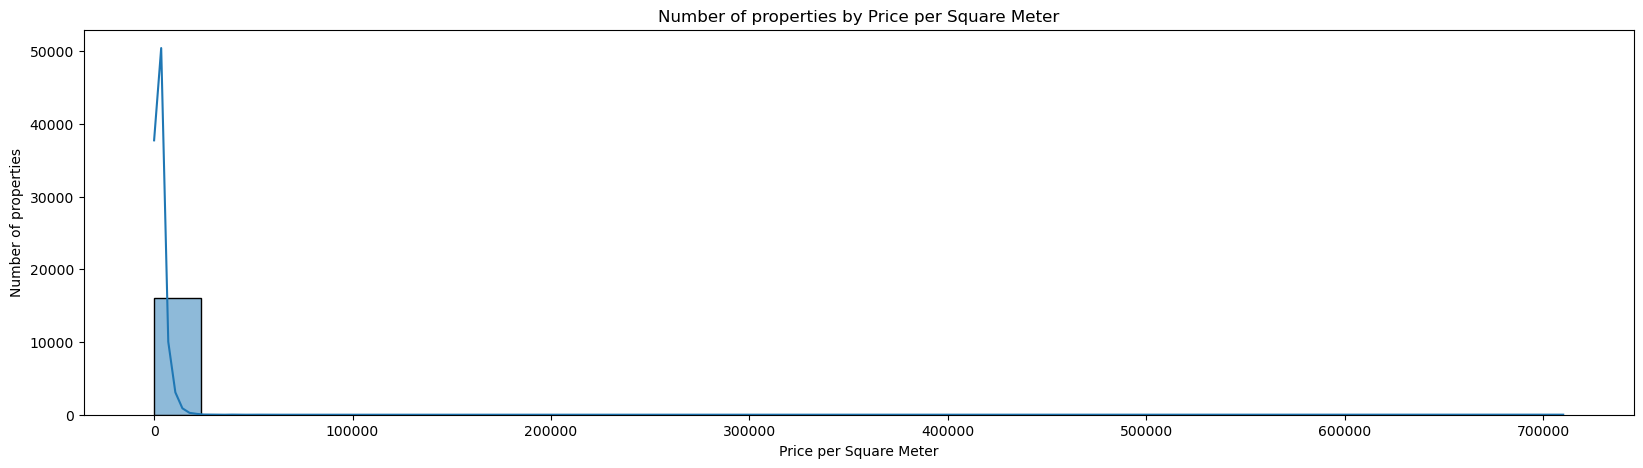

In [ ]:
# visualize the distrubtion of PpSM: Price per Square Meter
plt.figure( figsize=(20, 5))
sns.histplot(houses['PpSM'], bins=30, kde=True)
plt.title('Number of properties by Price per Square Meter')
plt.ylabel('Number of properties')
plt.xlabel('Price per Square Meter')
plt.show()

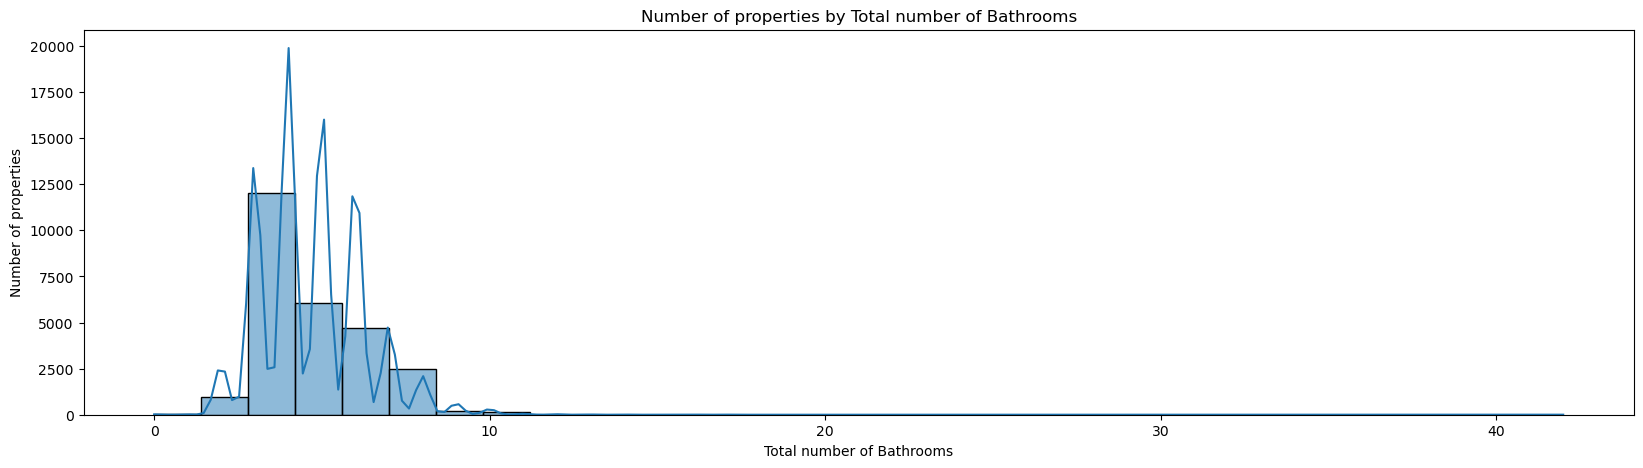

In [ ]:
# visualize the histplot of the Total number of Bathrooms
plt.figure( figsize=(20, 5))
sns.histplot(houses['TotalBathrooms'], bins=30, kde=True)
plt.title('Number of properties by Total number of Bathrooms')
plt.ylabel('Number of properties')
plt.xlabel('Total number of Bathrooms')
plt.show()

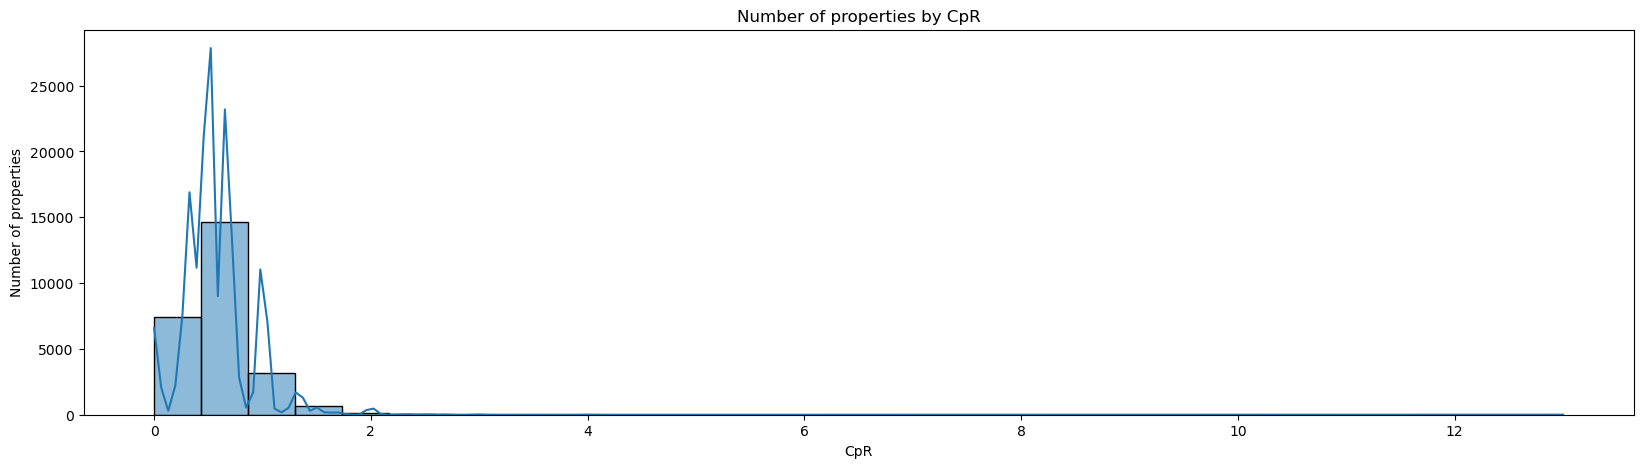

In [ ]:
# visualize the histplot of the CpR
plt.figure( figsize=(20, 5))
sns.histplot(houses['CpR'], bins=30, kde=True)
plt.title('Number of properties by CpR')
plt.ylabel('Number of properties')
plt.xlabel('CpR')
plt.show()

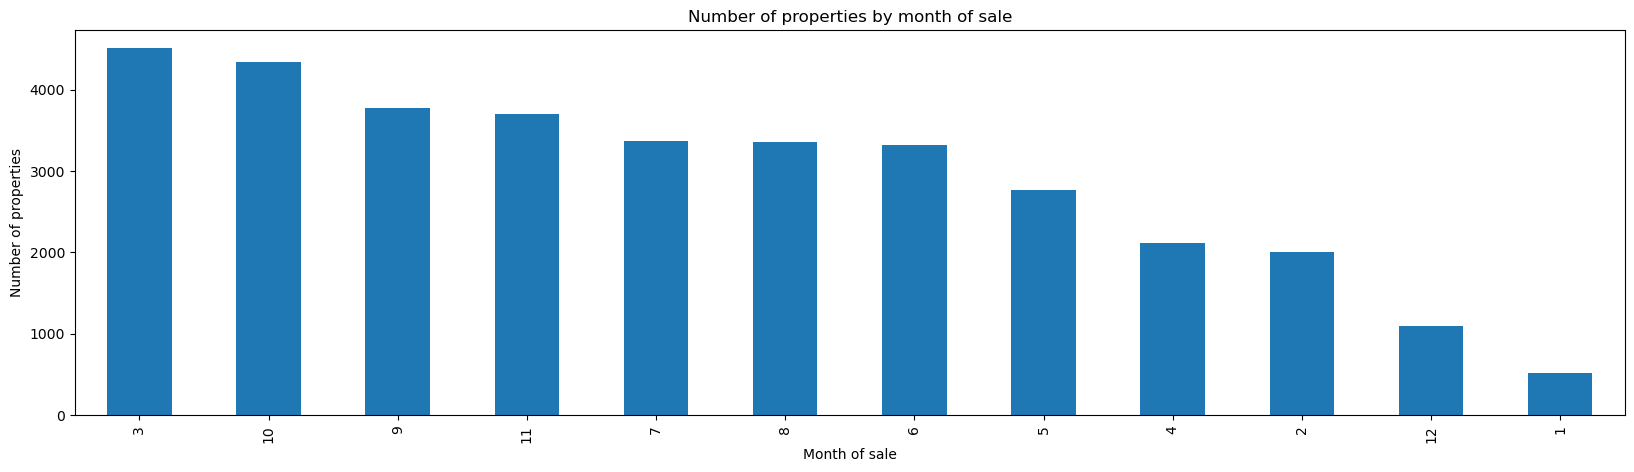

In [ ]:
# visualize the spread of month of sale
houses['Month'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by month of sale')
plt.ylabel('Number of properties')
plt.xlabel('Month of sale')
plt.show()

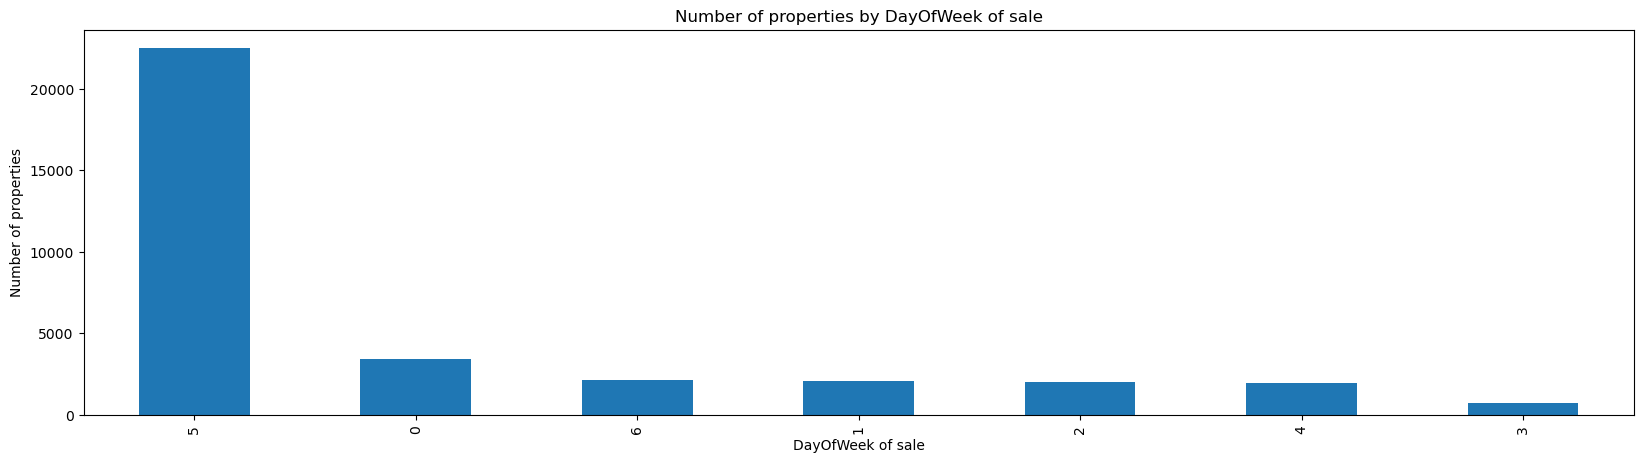

In [ ]:
# visualize the spread of DayOfWeek of sale
houses['DayOfWeek'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by DayOfWeek of sale')
plt.ylabel('Number of properties')
plt.xlabel('DayOfWeek of sale')
plt.show()

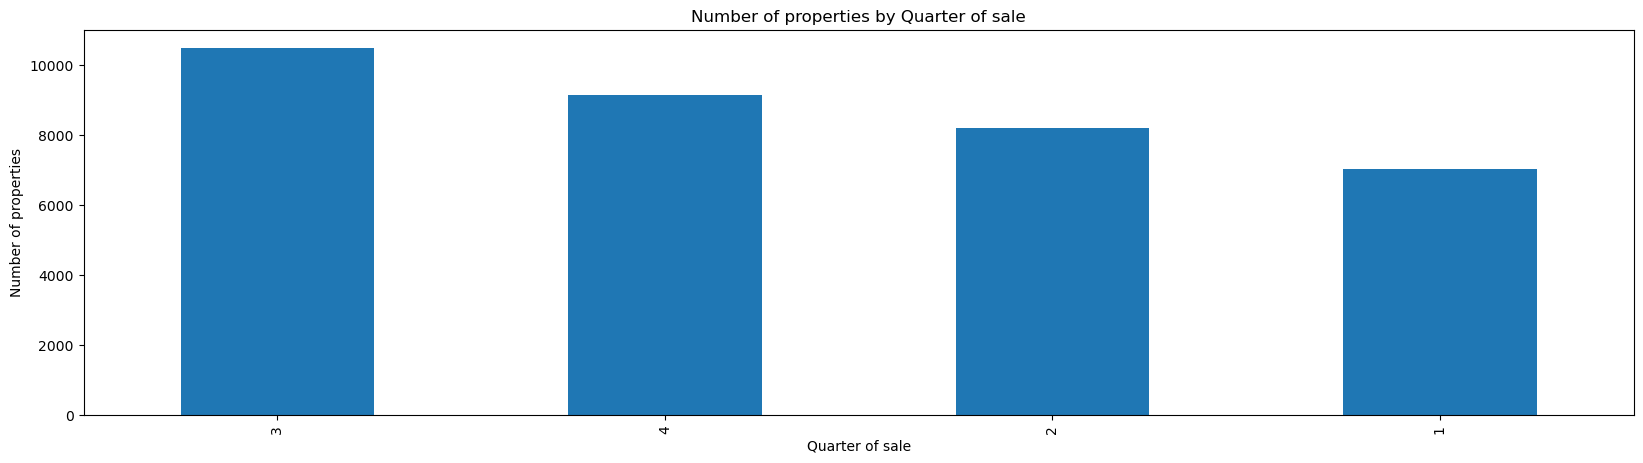

In [ ]:
# visualize the spread of Quarter of sale
houses['Quarter'].value_counts().plot(kind='bar', figsize=(20, 5))
plt.title('Number of properties by Quarter of sale')
plt.ylabel('Number of properties')
plt.xlabel('Quarter of sale')
plt.show()

#### EDA: Bivariate Analysis

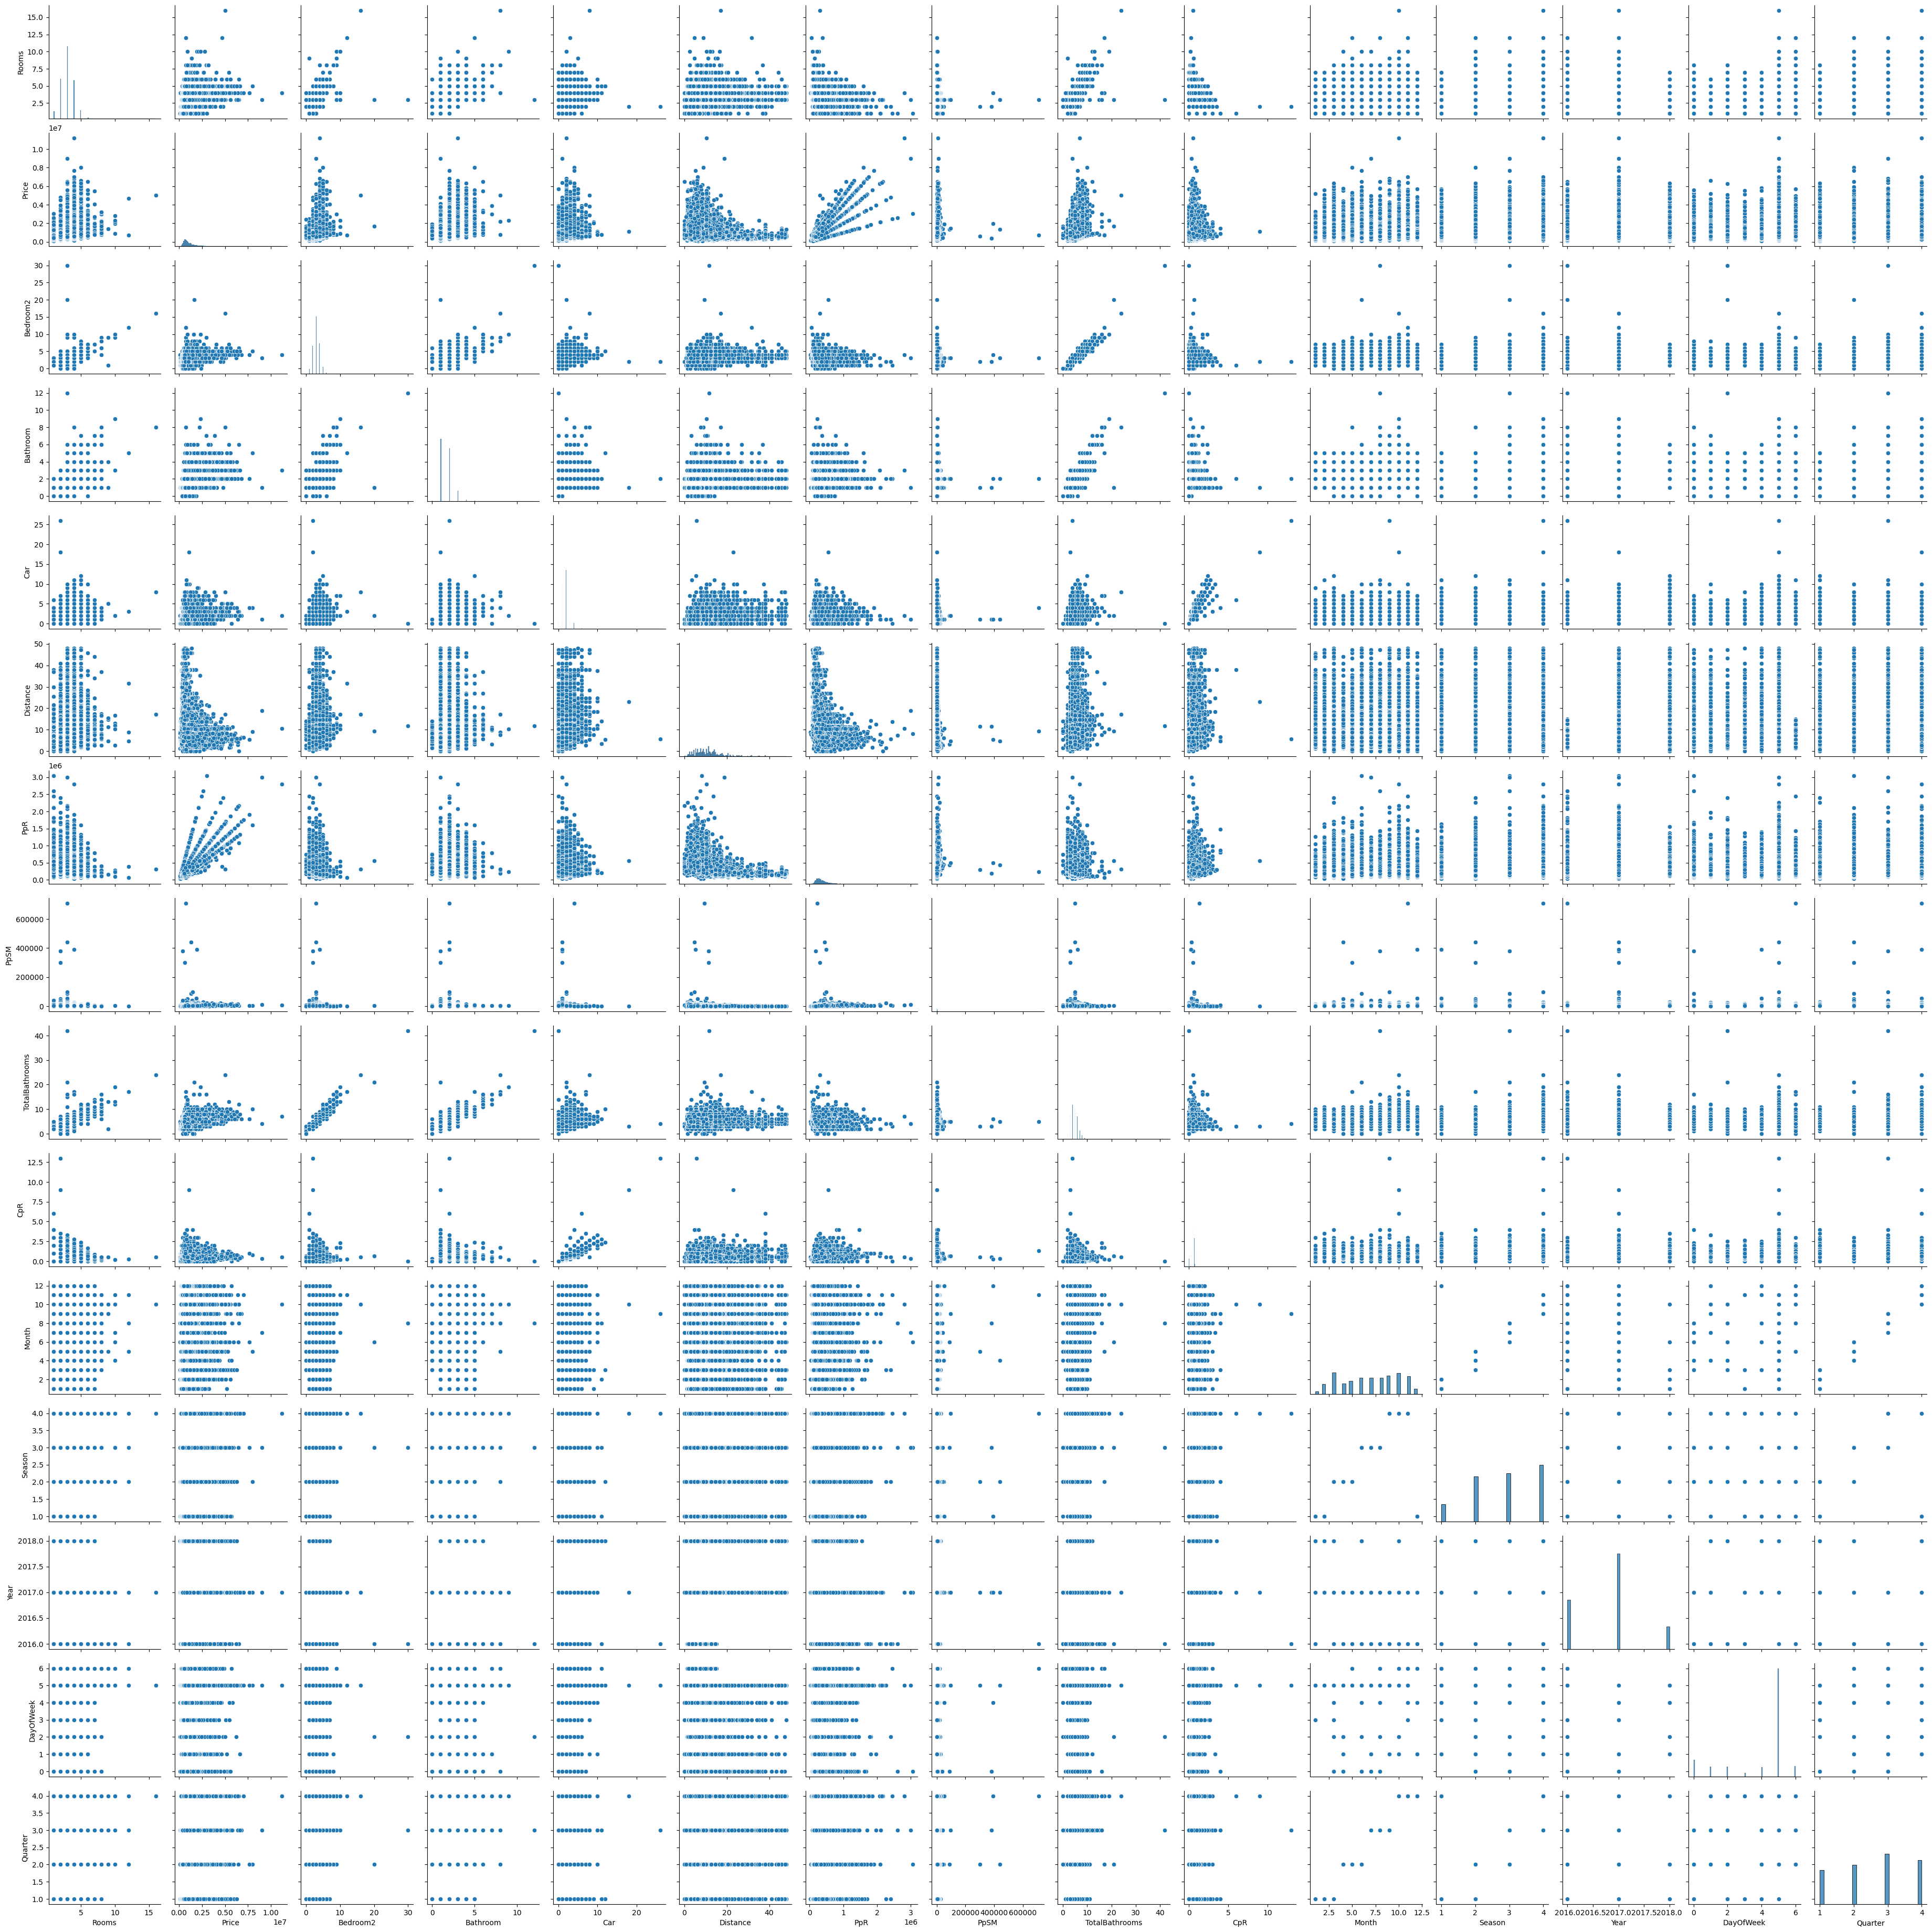

In [9]:
# visualize the pair plot of 'Landsize', 'Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Distance'
sns.pairplot(houses[['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 
       'Distance', 'PpR', 'PpSM', 'TotalBathrooms', 'CpR', 'Month',
       'Season', 'Year', 'DayOfWeek', 'Quarter']])
plt.show()

In [93]:
# list the columns
houses.columns

Index(['Suburb', 'Address', 'Rooms', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Propertycount', 'PpR', 'PpSM', 'TotalBathrooms', 'CpR', 'Month',
       'Season', 'Year', 'Type_h', 'Type_t', 'Type_u',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'DayOfWeek', 'Quarter'],
      dtype='object')

### Feature Engineering

In [7]:
### Feature Engineering
# Price per Room: Calculate the price per room by dividing the 'Price' by the total number of 'Rooms'. This can provide insights into the cost per living space.
# PpR: Price per Room
houses['PpR'] = houses['Price'] / houses['Rooms']
# Price per Square Meter: Calculate the price per square meter by dividing the 'Price' by 'Landsize' or 'BuildingArea'. This normalized metric can help compare property values irrespective of size.
# PpSM: Price per Square Meter
houses['PpSM'] = houses['Price'] / houses['Landsize']
# Total Bathrooms: Sum the 'Bathroom' and 'Bedroom2' features to create a new feature representing the total number of bathrooms in the property.
# Total Bathrooms
houses['TotalBathrooms'] = houses['Bathroom'] + houses['Bedroom2']
# Car Spaces per Room:Divide the 'Car' feature by the total number of 'Rooms' to get an average number of car spaces per room.
# Car Spaces per Room
houses['CpR'] = houses['Car'] / houses['Rooms']
# Seasonal Variables: Extract month and season information from the 'Date' feature to account for potential seasonal variations in property prices.
# Month
houses['Month'] = pd.DatetimeIndex(houses['Date']).month
# Season
houses['Season'] = houses['Month'] % 12 // 3 + 1
# Year
houses['Year'] = pd.DatetimeIndex(houses['Date']).year
# Categorical Encodings: Convert categorical features like 'Type', 'Method', 'SellerG', 'CouncilArea', and 'Regionname' into numerical representations using techniques such as one-hot encoding or label encoding.
# One-hot encoding
houses = pd.get_dummies(houses, columns=['Type', 'Regionname'])
# Time-Related Features: Extract additional time-related features from 'Date,' such as day of the week, quarter, or year, to capture temporal patterns.
# Day of the week
houses['DayOfWeek'] = pd.DatetimeIndex(houses['Date']).dayofweek
# Quarter
houses['Quarter'] = pd.DatetimeIndex(houses['Date']).quarter

C:\Users\DELL\AppData\Local\Temp\ipykernel_73208\290990997.py:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  houses['Month'] = pd.DatetimeIndex(houses['Date']).month
C:\Users\DELL\AppData\Local\Temp\ipykernel_73208\290990997.py:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  houses['Year'] = pd.DatetimeIndex(houses['Date']).year
C:\Users\DELL\AppData\Local\Temp\ipykernel_73208\290990997.py:26: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  houses['DayOfWeek'] = pd.DatetimeIndex(houses['Date']).dayofweek
C:\Users\DELL\AppData\Local\Temp\ipykernel_73208\

In [88]:
houses.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,DayOfWeek,Quarter
0,Abbotsford,68 Studley St,2,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,...,0,0,1,0,0,0,0,0,2,1
1,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,0,0,1,0,0,0,0,0,5,1
2,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,0,0,1,0,0,0,0,0,5,2
3,Abbotsford,18/659 Victoria St,3,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,...,0,0,1,0,0,0,0,0,5,2
4,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,0,0,1,0,0,0,0,0,0,2


In [32]:
#function to wrangle the data
def wrangle(file):
    # read the data
    df = pd.read_csv(file)

    #drop the duplicate rows
    df = df.drop_duplicates()

    # get the subset of data that has a price
    mask_price = df['Price'].notnull()
    df = df[mask_price]

    # drop the columns that have more than 50% missing values
    missing_threshold = df.columns[df.isnull().mean() > 0.5]    
    df.drop(
        columns = missing_threshold,
        inplace=True
        )
    
    # feature engineering
    # Price per Room: Calculate the price per room by dividing the 'Price' by the total number of 'Rooms'. This can provide insights into the cost per living space.
    # PpR: Price per Room
    df['PpR'] = df['Price'] / df['Rooms']
    # Price per Square Meter: Calculate the price per square meter by dividing the 'Price' by 'Landsize' or 'BuildingArea'. This normalized metric can help compare property values irrespective of size.
    # PpSM: Price per Square Meter
    df['PpSM'] = df['Price'] / df['Landsize']
    # Total Bathrooms: Sum the 'Bathroom' and 'Bedroom2' features to create a new feature representing the total number of bathrooms in the property.
    # Total Bathrooms
    df['TotalBathrooms'] = df['Bathroom'] + df['Bedroom2']
    # Car Spaces per Room:Divide the 'Car' feature by the total number of 'Rooms' to get an average number of car spaces per room.
    # Car Spaces per Room
    df['CpR'] = df['Car'] / df['Rooms']
    # Seasonal Variables: Extract month and season information from the 'Date' feature to account for potential seasonal variations in property prices.
    # Month
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    # Season
    df['Season'] = df['Month'] % 12 // 3 + 1
    # Time-Related Features: Extract additional time-related features from 'Date,' such as day of the week, quarter, or year, to capture temporal patterns.
    # Day of the week
    df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).dayofweek
    # Quarter
    df['Quarter'] = pd.DatetimeIndex(df['Date']).quarter
    # Categorical Encodings: Convert categorical features like 'Type', 'Method', 'SellerG', 'CouncilArea', and 'Regionname' into numerical representations using techniques such as one-hot encoding or label encoding.
    # One-hot encoding with prefix 'T_' and 'RN_'
    df = pd.get_dummies(df, columns=['Type', 'Regionname'], prefix=['T_', 'RN_'])

    # drop rows with missing values in Bedroom2, Landsize, Car, Longtitude columns
    df.dropna(subset=['Bedroom2', 'Landsize', 'Car', 'Longtitude'], inplace=True)

    # drop the columns that are not needed
    df.drop(
        columns = [
            'Address', # High cardinality
            'Method', # method is gotten when sold, however model is to predict the price before it is sold
            'Date', # Date is already broken into Month, Season, Year, DayOfWeek, Quarter
            'SellerG', # High cardinality
            'CouncilArea', # High cardinality
            'Suburb', # High cardinality
            'Postcode'], # High cardinality
        inplace=True
        )

    return df

In [ ]:
# call the wrangle function
df = wrangle('data.csv')

In [34]:
# check cardinality of the categorical features
cardinality = df.select_dtypes(exclude='number').nunique()
print(cardinality.sort_values())

Series([], dtype: float64)


In [35]:
# get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17679 entries, 1 to 34856
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rooms                           17679 non-null  int64  
 1   Price                           17679 non-null  float64
 2   Distance                        17679 non-null  float64
 3   Bedroom2                        17679 non-null  float64
 4   Bathroom                        17679 non-null  float64
 5   Car                             17679 non-null  float64
 6   Landsize                        17679 non-null  float64
 7   Lattitude                       17679 non-null  float64
 8   Longtitude                      17679 non-null  float64
 9   Propertycount                   17679 non-null  float64
 10  PpR                             17679 non-null  float64
 11  PpSM                            17679 non-null  float64
 12  TotalBathrooms                  

In [36]:
# get the total number of missing data
df.isnull().sum()

Rooms                             0
Price                             0
Distance                          0
Bedroom2                          0
Bathroom                          0
Car                               0
Landsize                          0
Lattitude                         0
Longtitude                        0
Propertycount                     0
PpR                               0
PpSM                              0
TotalBathrooms                    0
CpR                               0
Month                             0
Season                            0
DayOfWeek                         0
Quarter                           0
T__h                              0
T__t                              0
T__u                              0
RN__Eastern Metropolitan          0
RN__Eastern Victoria              0
RN__Northern Metropolitan         0
RN__Northern Victoria             0
RN__South-Eastern Metropolitan    0
RN__Southern Metropolitan         0
RN__Western Metropolitan    

In [40]:
# check for duplicate rows
df.duplicated().sum()

8

In [38]:
#view duplicated rows
df[df.duplicated()]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,T__t,T__u,RN__Eastern Metropolitan,RN__Eastern Victoria,RN__Northern Metropolitan,RN__Northern Victoria,RN__South-Eastern Metropolitan,RN__Southern Metropolitan,RN__Western Metropolitan,RN__Western Victoria
6127,4,1315000.0,7.5,4.0,2.0,2.0,458.0,-37.79810,145.04720,2671.0,...,0,0,0,0,0,0,0,1,0,0
12655,3,720000.0,7.8,3.0,2.0,2.0,531.0,-37.74240,144.95710,11204.0,...,1,0,0,0,1,0,0,0,0,0
14110,4,1817000.0,4.2,4.0,2.0,1.0,309.0,-37.79100,144.92800,5263.0,...,0,0,0,0,1,0,0,0,0,0
16460,4,1071888.0,11.2,4.0,2.0,4.0,553.0,-37.71328,144.90585,2651.0,...,0,0,0,0,1,0,0,0,0,0
16476,4,1300000.0,21.5,4.0,2.0,2.0,597.0,-37.99232,145.08469,5087.0,...,0,0,0,0,0,0,1,0,0,0
19346,3,920000.0,1.6,3.0,1.0,0.0,98.0,-37.79633,144.97269,6786.0,...,0,0,0,0,1,0,0,0,0,0
19616,2,541000.0,8.5,2.0,1.0,1.0,133.0,-37.72136,144.92932,7485.0,...,0,1,0,0,1,0,0,0,0,0
21208,2,965000.0,7.3,2.0,2.0,1.0,704.0,-37.85698,145.04686,10412.0,...,1,0,0,0,0,0,0,1,0,0
